In [426]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st

In [427]:
df=pd.read_csv('Expanded_data_with_more_features - Expanded_data_with_more_features.csv')

In [428]:
df.describe()

,id,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [429]:
df.head()

,id,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [430]:
df.columns

Index(['id', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

### 1.  Replace the null value of all columns with the mode value of those columns.

In [431]:
pd.DataFrame(df.isnull().sum())

,0
id,0
Gender,0
EthnicGroup,1840
ParentEduc,1845
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,1572


In [432]:
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [433]:
df.EthnicGroup.mode()

0    group C
Name: EthnicGroup, dtype: object

In [434]:
df['EthnicGroup'].fillna("group C",inplace=True)

In [435]:
df.ParentEduc.mode()

0    some college
Name: ParentEduc, dtype: object

In [436]:
df.TestPrep.mode()

0    none
Name: TestPrep, dtype: object

In [437]:
df.ParentMaritalStatus.mode()

0    married
Name: ParentMaritalStatus, dtype: object

In [438]:
df.IsFirstChild.mode()

0    yes
Name: IsFirstChild, dtype: object

In [439]:
df.PracticeSport.mode()

0    sometimes
Name: PracticeSport, dtype: object

In [440]:
df.NrSiblings.mode()

0    1.0
Name: NrSiblings, dtype: float64

In [441]:
df.TransportMeans.mode()

0    school_bus
Name: TransportMeans, dtype: object

In [442]:
df.WklyStudyHours.mode()

0    5 - 10
Name: WklyStudyHours, dtype: object

In [443]:
df.ParentEduc.fillna("some college",inplace=True)
df.TestPrep.fillna("none",inplace=True)
df.ParentMaritalStatus.fillna("married",inplace=True)
df.PracticeSport.fillna("sometimes",inplace=True)
df.IsFirstChild.fillna("yes",inplace=True)
df.NrSiblings.fillna(1.0,inplace=True)
df.TransportMeans.fillna("school_bus",inplace=True)
df.WklyStudyHours.fillna("5 - 10",inplace=True)

In [444]:
pd.DataFrame(df.isnull().sum())

,0
id,0
Gender,0
EthnicGroup,0
ParentEduc,0
LunchType,0
TestPrep,0
ParentMaritalStatus,0
PracticeSport,0
IsFirstChild,0
NrSiblings,0


### Clean the "WklyStudyHours" column in the dataset, replacing "< 5" with 4, "> 10" with 11, and "5 - 10" with the average of the lower and upper values.

In [445]:
df['WklyStudyHours'].unique()

array(['< 5', '5 - 10', '> 10'], dtype=object)

In [446]:
(5+10)/2

7.5

In [447]:
df['WklyStudyHours'] = df['WklyStudyHours'].str.replace("< 5","4")
df['WklyStudyHours'] = df['WklyStudyHours'].str.replace("> 10","11")
df['WklyStudyHours'] = df['WklyStudyHours'].str.replace("5 - 10","7.5")

In [448]:
df['WklyStudyHours'].unique()

array(['4', '7.5', '11'], dtype=object)

In [449]:
df['WklyStudyHours']=pd.to_numeric(df['WklyStudyHours'])

In [450]:
df['WklyStudyHours'].dtype

dtype('float64')

### Sort the dataset by TestPrep in descending order and then by NrSiblings in 
ascending order

### Create a new column named "ParentEducLevel" that categorizes ParentEduc into two levels: "Higher Education" for those with a bachelor's degree or master’s degree, and "Lower Education" for the rest.

In [451]:
df['ParentEduc'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [452]:
df['ParentEducLevel'] = "Lower Education"

In [453]:
df['ParentEducLevel']=df[(df['ParentEduc']=="bachelor's degree") |(df['ParentEduc']=="master's degree")]['ParentEducLevel'].str.replace("Lower Education","Higher Education") 

In [454]:
df.head()

,id,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,ParentEducLevel
0,0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,4.0,71,71,74,Higher Education
1,1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,7.5,69,90,88,NaN
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,4.0,87,93,91,Higher Education
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,7.5,45,56,42,NaN
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,7.5,76,78,75,NaN


In [455]:
df['ParentEducLevel'].fillna("Lower Education",inplace=True)

In [456]:
df['ParentEducLevel'].unique()

array(['Higher Education', 'Lower Education'], dtype=object)

###  Is there a significant difference in the mean weekly study hours between students who completed the test prep and those who did not? Perform a t-test to analyze the data

In [457]:
df['TestPrep'].unique()

array(['none', 'completed'], dtype=object)

In [458]:
df['WklyStudyHours'].unique()

array([ 4. ,  7.5, 11. ])

In [459]:
notp = df[df['TestPrep']=='none']['WklyStudyHours']
tp = df[df['TestPrep']=='completed']['WklyStudyHours']

In [460]:
stat,p = st.ttest_ind(notp,tp)

In [461]:
if p<=0.05:
    print("There is Significant difference")
else:
    print("no difference")

no difference


### Use a chi-square test to determine if there is a significant association between the EthnicGroup and ParentEduc variables in the dataset

In [462]:
t = pd.crosstab(index = df.EthnicGroup, columns = df.ParentEduc )

In [463]:
t

ParentEduc,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
EthnicGroup,,,,,,
group A,404,259,429,122,614,391
group B,1067,605,1116,404,1575,1059
group C,2013,1211,2002,740,3067,2019
group D,1339,847,1391,503,2099,1324
group E,727,464,749,254,1123,724


In [464]:
chi2,p,dof,ex = st.chi2_contingency(t)

In [465]:
if p<=0.05:
    print("there's significant association")
else:
    print("there's no association")

there's no association


###  Use the Shapiro-Wilk test to determine if the distribution of weekly study hours is significantly different from a normal distribution in the dataset

In [466]:
w,p = st.shapiro(df['WklyStudyHours'])
p

c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

In [467]:
if p<=0.05:
    print(" Not a normal distribution ")
else:
    print("Normal Distribution")

 Not a normal distribution 


### What is the mean weekly study hours for each combination of ParentEduc, LunchType, and PracticeSport?( Do it only into a single Table 

### What is the median weekly study hours for each combination of Gender, 
ParentMaritalStatus, and TransportMeans?

###  Create a bar plot to visualize the distribution of students across different EthnicGroups

In [468]:
df.head()

,id,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,ParentEducLevel
0,0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,4.0,71,71,74,Higher Education
1,1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,7.5,69,90,88,Lower Education
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,4.0,87,93,91,Higher Education
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,7.5,45,56,42,Lower Education
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,7.5,76,78,75,Lower Education


In [469]:
df.EthnicGroup.unique()

array(['group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [470]:
dfx = pd.DataFrame({"EthnicGroup":['group C', 'group B', 'group A', 'group D', 'group E']})

In [471]:
ethnic_count = df.EthnicGroup.value_counts().reset_index(name='count').rename(columns={'index': 'EthnicGroup'})
ethnic_count

,EthnicGroup,count
0,group C,11052
1,group D,7503
2,group B,5826
3,group E,4041
4,group A,2219


<Axes: xlabel='EthnicGroup', ylabel='count'>

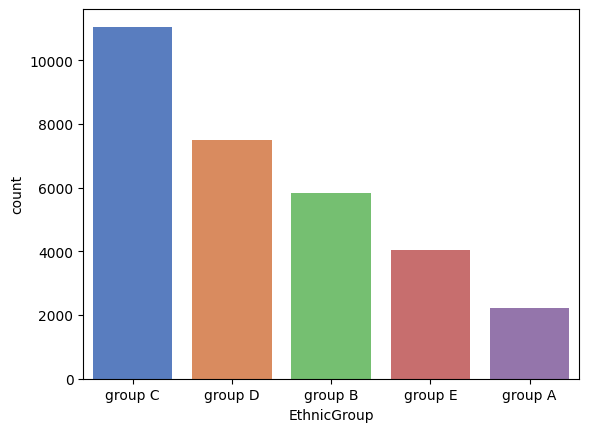

In [472]:
sns.barplot(x = ethnic_count['EthnicGroup'], y = ethnic_count['count'], data = ethnic_count,palette='muted')

### Create a box plot to compare the distribution of weekly study hours for students who completed the test prep versus those who did no

<Axes: xlabel='TestPrep', ylabel='WklyStudyHours'>

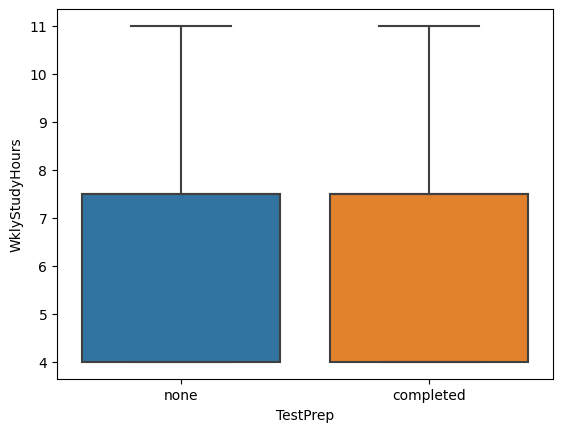

In [473]:
sns.boxplot(x =df['TestPrep'],y = df['WklyStudyHours'])

###  Create a scatter plot to analyze the relationship between weekly study hours and the number of siblings (NrSiblings)

<Axes: xlabel='WklyStudyHours', ylabel='NrSiblings'>

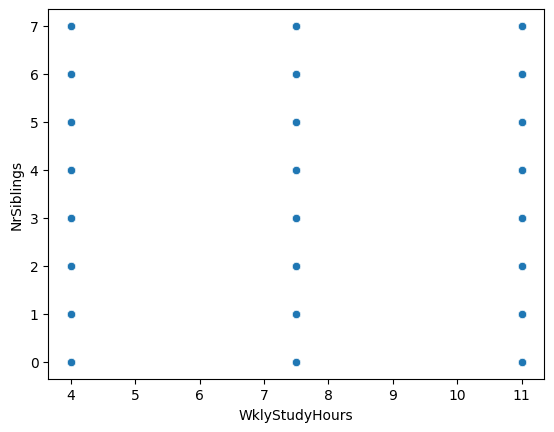

In [474]:
sns.scatterplot(x = df['WklyStudyHours'],y = df['NrSiblings'])

### Create a histogram to visualize the distribution of weekly study hours among 
students.

<Axes: xlabel='WklyStudyHours', ylabel='Count'>

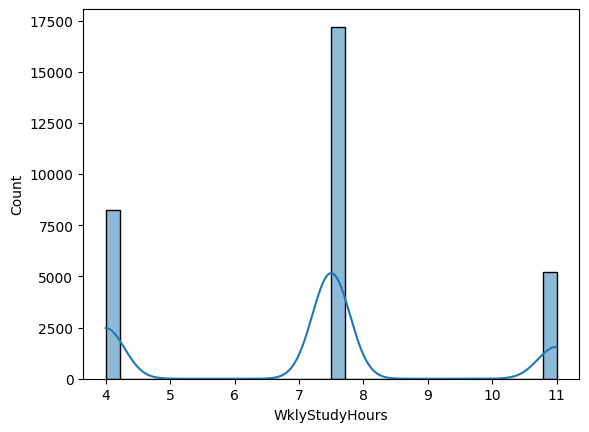

In [475]:
sns.histplot(df['WklyStudyHours'],kde=True)

### What is the percentage distribution of ParentMaritalStatus categories in the dataset using value_counts

In [476]:
mart = pd.DataFrame(df['ParentMaritalStatus'].value_counts()).reset_index().rename(columns={'index':'ParentMaritalStatus','ParentMaritalStatus':'count'})
mart['Percent']=round(mart['count']/sum(mart['count'])*100,2)
mart

,ParentMaritalStatus,count,Percent
0,married,18034,58.86
1,single,7097,23.16
2,divorced,4919,16.05
3,widowed,591,1.93


### How many unique ParentEduc categories are there in the dataset?

In [477]:
df['ParentEduc'].unique().shape[0]

6

  Get the rows where the ParentEduc is either "bachelor's degree" or "master's 
degree" and the LunchType is "standard"

In [478]:
df[((df['ParentEduc']=="bachelor's degree") | (df['ParentEduc']== "master's degree"))&(df['LunchType']=="standard")]

,id,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,ParentEducLevel
0,0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,4.0,71,71,74,Higher Education
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,4.0,87,93,91,Higher Education
14,14,female,group A,master's degree,standard,none,divorced,sometimes,yes,2.0,private,4.0,48,53,58,Higher Education
27,27,female,group C,bachelor's degree,standard,none,married,sometimes,yes,4.0,school_bus,11.0,69,70,76,Higher Education
72,79,female,group E,master's degree,standard,none,divorced,never,yes,1.0,school_bus,7.5,60,68,68,Higher Education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30614,495,male,group D,bachelor's degree,standard,none,divorced,sometimes,no,1.0,school_bus,7.5,82,73,80,Higher Education
30620,622,male,group C,bachelor's degree,standard,none,married,sometimes,no,4.0,private,7.5,91,85,77,Higher Education
30621,638,female,group A,bachelor's degree,standard,none,single,regularly,no,2.0,private,7.5,66,80,78,Higher Education
30624,642,female,group B,bachelor's degree,standard,completed,single,regularly,no,1.0,private,7.5,41,66,65,Higher Education


 ### Identify and analyze potential outliers in the weekly study hours (WklyStudyHours) column of the dataset. Solve it with Z score and Box plot both methods

In [479]:
df['WklyStudyHours'].describe()

count    30641.000000
mean         7.153210
std          2.291964
min          4.000000
25%          4.000000
50%          7.500000
75%          7.500000
max         11.000000
Name: WklyStudyHours, dtype: float64

In [480]:
mean = df['WklyStudyHours'].mean()
std = df['WklyStudyHours'].std()
print("mean:",mean)
print("std:",std)

mean: 7.1532097516399595
std: 2.2919643855889857


In [485]:
threshold = 3

In [486]:
z_scores = (df['WklyStudyHours']-mean)/std

In [487]:
df_no_outliers = df[abs(z_scores) < threshold]

<Axes: ylabel='WklyStudyHours'>

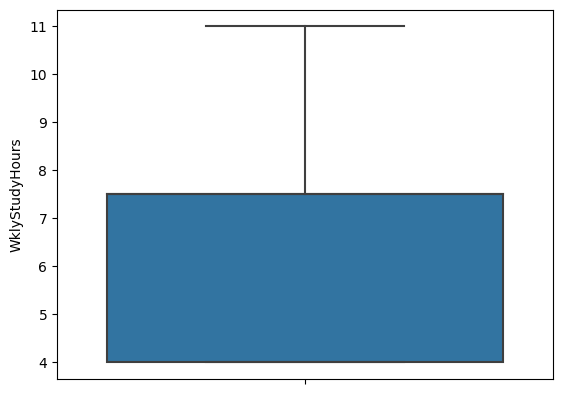

In [488]:
sns.boxplot(data = df_no_outliers, y = 'WklyStudyHours')

In [489]:
q1 = df['WklyStudyHours'].quantile(0.25)
q2 = df['WklyStudyHours'].quantile(0.50)
q3 = df['WklyStudyHours'].quantile(0.75)
IQR = q3-q1

In [490]:
q1

4.0

In [491]:
q2

7.5

In [492]:
q3

7.5

In [493]:
IQR

3.5

In [494]:
l_b = q1-1.5*IQR
U_b = q3+1.5*IQR

In [495]:
l_b

-1.25

In [496]:
U_b

12.75

In [366]:
df_no_outliers = df[(df['WklyStudyHours']<=U_b) & (df['WklyStudyHours']>=l_b)]

In [497]:
df_no_outliers['WklyStudyHours'].describe()

count    30641.000000
mean         7.153210
std          2.291964
min          4.000000
25%          4.000000
50%          7.500000
75%          7.500000
max         11.000000
Name: WklyStudyHours, dtype: float64

<Axes: xlabel='WklyStudyHours', ylabel='Count'>

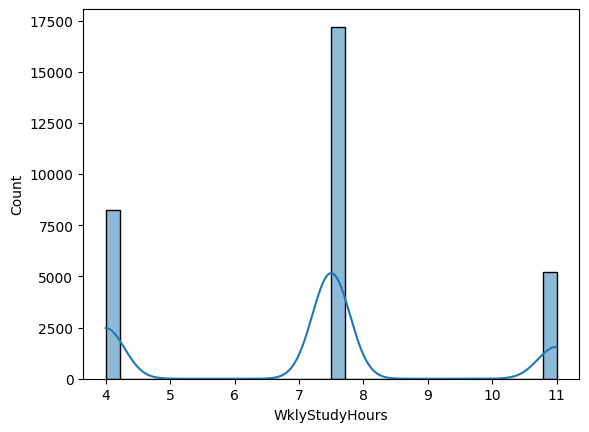

In [369]:
sns.histplot(x = df_no_outliers['WklyStudyHours'],kde=True)


- 1.5 in the formula is the threshold, it can be changed accordingly

 Create a new column called "StudyHoursCategory" that categorizes the weekly 
study hours (WklyStudyHours) into three groups: 'Low' for hours less than 5, 
'Medium' for hours between 5 and 10, and 'High' for hours greater than 10. How 
many students fall into each StudyHoursCategory?

In [529]:
df.drop('StudyHoursCategory', axis=1, inplace=True)

In [530]:
df.columns

Index(['id', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore', 'ParentEducLevel'],
      dtype='object')

In [531]:
df['StudyHoursCategory'] = "Low"

In [546]:
df.loc[(df['WklyStudyHours'] >= 5) & (df['WklyStudyHours'] <= 10), 'StudyHoursCategory'] = df.loc[(df['WklyStudyHours'] >= 5) & (df['WklyStudyHours'] <= 10), 'StudyHoursCategory'].str.replace("Low", "Medium")

In [548]:
df.loc[df['WklyStudyHours']>10,'StudyHoursCategory'] = df.loc[df['WklyStudyHours']>10,'StudyHoursCategory'].str.replace("Low","High")

In [550]:
df['StudyHoursCategory'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [552]:
pd.DataFrame(df['StudyHoursCategory'].value_counts())

,StudyHoursCategory
Medium,17201
Low,8238
High,5202
